Promedios por modelo:
                            fscore  precision    recall
SFS_Inf_mutua             0.471000   0.975585  0.311244
SFS_Inf_mutua_penalizada  0.471000   0.975585  0.311244
B&B_Inf_mutua             0.467222   0.976481  0.307667
B&B_Inf_mutua_penalizada  0.467222   0.976481  0.307667


<Figure size 1200x600 with 0 Axes>

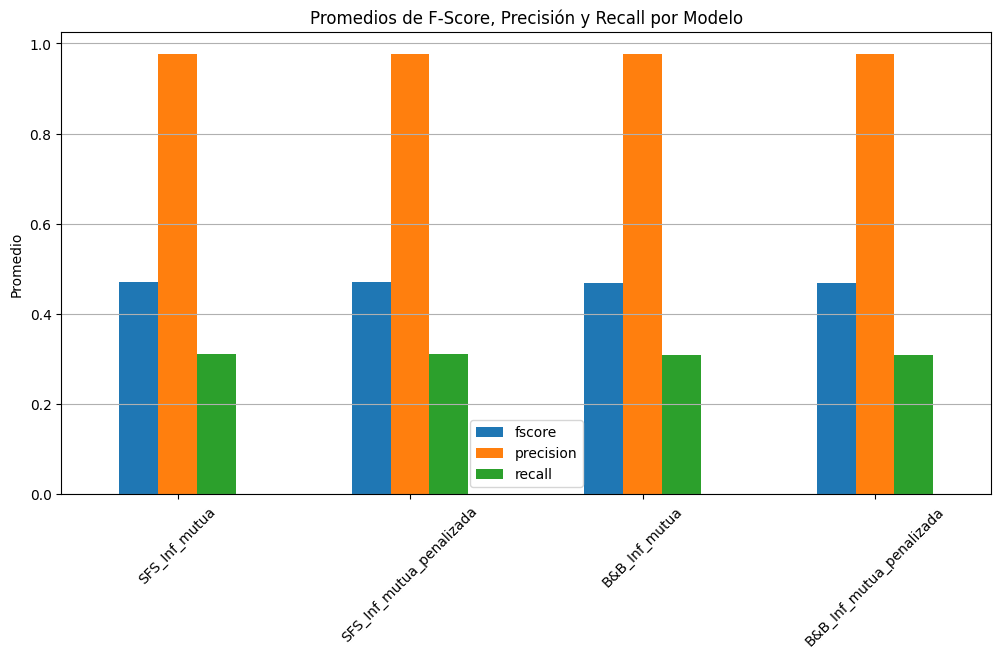

Matrices de confusión para el archivo 110, modelo SFS_Inf_mutua:


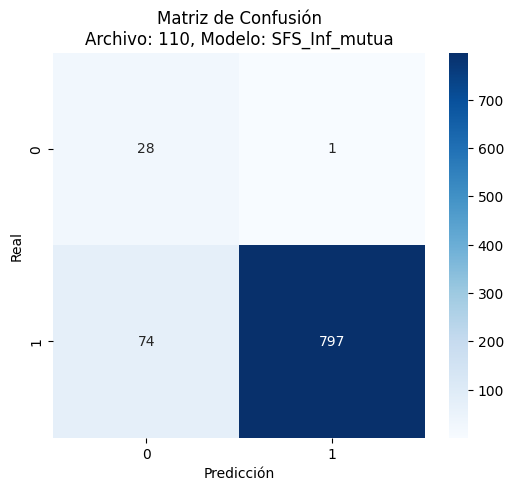

In [1]:
import json
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar el archivo JSON
with open("resultados_totales.json", "r") as file:
    resultados = json.load(file)

# Función para calcular promedios por modelo
def calcular_promedios(resultados):
    promedios = {}
    conteo = {}

    for numero, modelos in resultados.items():
        for modelo, metricas in modelos.items():
            if modelo == "mejor_modelo":
                continue  # Ignorar la clave 'mejor_modelo'
            if modelo not in promedios:
                promedios[modelo] = {"fscore": 0, "precision": 0, "recall": 0}
                conteo[modelo] = 0
            promedios[modelo]["fscore"] += metricas["fscore"]
            promedios[modelo]["precision"] += metricas["precision"]
            promedios[modelo]["recall"] += metricas["recall"]
            conteo[modelo] += 1

    for modelo in promedios:
        promedios[modelo]["fscore"] /= conteo[modelo]
        promedios[modelo]["precision"] /= conteo[modelo]
        promedios[modelo]["recall"] /= conteo[modelo]

    return promedios

# Calcular promedios
promedios = calcular_promedios(resultados)

# Mostrar promedios
df_promedios = pd.DataFrame(promedios).T
print("Promedios por modelo:")
print(df_promedios)

# Visualización de los promedios
plt.figure(figsize=(12, 6))
df_promedios.plot(kind="bar", figsize=(12, 6))
plt.title("Promedios de F-Score, Precisión y Recall por Modelo")
plt.ylabel("Promedio")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Seleccionar un archivo al azar y mostrar matrices de confusión
archivo_random = random.choice(list(resultados.keys()))
mejor_modelo = resultados[archivo_random]["mejor_modelo"]
print(f"Matrices de confusión para el archivo {archivo_random}, modelo {mejor_modelo}:")

# Mostrar la matriz de confusión del modelo seleccionado
matriz_confusion = resultados[archivo_random][mejor_modelo]["matriz_confusion"]
matriz_confusion = np.array(matriz_confusion)

# Gráfico de la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
plt.title(f"Matriz de Confusión\nArchivo: {archivo_random}, Modelo: {mejor_modelo}")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


Conteo de mejores modelos:
B&B_Inf_mutua    27
SFS_Inf_mutua    17
Name: count, dtype: int64


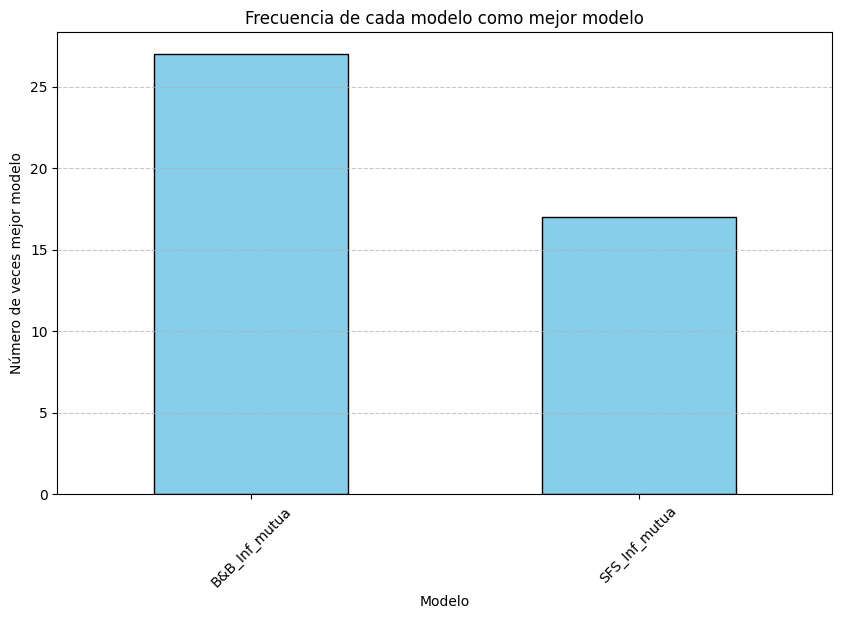

In [2]:
# Contar cuántas veces fue mejor cada modelo
mejores_modelos = [resultados[archivo]["mejor_modelo"] for archivo in resultados]
conteo_mejores_modelos = pd.Series(mejores_modelos).value_counts()

# Mostrar el conteo
print("Conteo de mejores modelos:")
print(conteo_mejores_modelos)

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
conteo_mejores_modelos.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Frecuencia de cada modelo como mejor modelo")
plt.xlabel("Modelo")
plt.ylabel("Número de veces mejor modelo")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [7]:
metricas_promedio = df_promedios.copy()
promedios_por_modelo = df_promedios.copy()